In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import logging
import librosa
import sys
# import tensorflow as tf
import plotly.graph_objects as go
import plotly.express as px
import re 
import string



sns.set_theme()

In [3]:
!pip3 install --user --upgrade tensorflow

In [3]:
module_path =os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/scripts")

if module_path not in sys.path:
    sys.path.append(module_path+"/model")



logging.basicConfig(filename='../logs/PreProcess.log', filemode='w', format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',level=logging.INFO)

In [16]:
!pip3 install --user --upgrade tensorflow

In [17]:
from tensorflow.compat.v1 import keras
import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior()
tf.compat.v1.disable_eager_execution()
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
tf.keras.backend.set_session(tf.Session(config=config))

NotFoundError: /opt/miniconda/lib/python3.9/site-packages/tensorflow/core/kernels/libtfkernel_sobol_op.so: undefined symbol: _ZN10tensorflow6StatusC1ENS_5error4CodeEN4absl14lts_2020_09_2311string_viewEOSt6vectorINS_10StackFrameESaIS7_EE

In [4]:
logging.info(" ===== Loading created scripts ===== ")
try:    
    import audio
    from models import *
    from moedlbuild import *
    from data_gen import AudioGenerator

    logging.info(" ==== Succefully Loaded the Modules ===== ")
    print(" ===== Succefully loaded modules, modules are now ready to use ===== ")
except ImportError as error:
    
    logging.info(" !!!! Import Error  !!!! ")
    print(" !!!! The system ran into an Import Error \n ")
    print(error.__class__ )
    sys.exit(1)


SyntaxError: invalid syntax (models.py, line 1)

In [5]:
#we read the data
try:
    print("===== Reading Dataset ===== \n ")
    logging.info("====== Redaing Dataset ====== ")
    data=pd.read_csv('../data/merged_data.csv')
    print(" ==== Successfuly read dataset ===== \n")
except FileNotFoundError as e:
        
    logging.info(" !!!! File Not Found Error  !!!! ")
    print(" !!!! The system ran into a File Not Found Erro !!! \n ")
    print(e.__class__.__name__ )
    sys.exit(1)
    

===== Reading Dataset ===== 
 
 ==== Successfuly read dataset ===== 



In [6]:
data

wav_file  \
0      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
1      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
2      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
3      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
4      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
...                                                  ...   
10174  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10175  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10176  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10177  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10178  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   

                                                    text  length  
0      yanayo andaliwa nami pendo pondo idhaa ya kisw...      51  
1      inayokutangazia moja kwa moja kutoka jijini da...      66  
2      juma hili bara la afrika limeshuhudia raia wa ...      59  
3        wakipiga kura ya maoni ilikufanya mabadiliko ya      47  
4                         kule abidjan raia wa jiji hilo      30  
...                                                  ...     ...  
10174             na somo lile lililopokelewa kule kenya      38  
10175            ambapo mtu aliyeshindwa kwenye uchaguzi      39  
10176        ni kauli yake mchambuzi wa masuala ya siasa      43  
10177  mwanasheria anayemtetea rais wa zamani wa liberia      49  
10178  na kesi yake ya kubadilishana almasi na silaha...      85  

[10179 rows x 3 columns]

In [7]:
location_directory='../data/alldata'

def add_root(x):
    x=os.path.join(location_directory,x)
    
    return x

data['Location']=data['wav_file'].apply(lambda x:add_root(x) )

data

wav_file  \
0      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
1      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
2      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
3      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
4      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
...                                                  ...   
10174  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10175  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10176  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10177  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10178  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   

                                                    text  length  \
0      yanayo andaliwa nami pendo pondo idhaa ya kisw...      51   
1      inayokutangazia moja kwa moja kutoka jijini da...      66   
2      juma hili bara la afrika limeshuhudia raia wa ...      59   
3        wakipiga kura ya maoni ilikufanya mabadiliko ya      47   
4                         kule abidjan raia wa jiji hilo      30   
...                                                  ...     ...   
10174             na somo lile lililopokelewa kule kenya      38   
10175            ambapo mtu aliyeshindwa kwenye uchaguzi      39   
10176        ni kauli yake mchambuzi wa masuala ya siasa      43   
10177  mwanasheria anayemtetea rais wa zamani wa liberia      49   
10178  na kesi yake ya kubadilishana almasi na silaha...      85   

                                                Location  
0      ../data/alldata/SWH-05-20101106_16k-emission_s...  
1      ../data/alldata/SWH-05-20101106_16k-emission_s...  
2      ../data/alldata/SWH-05-20101106_16k-emission_s...  
3      ../data/alldata/SWH-05-20101106_16k-emission_s...  
4      ../data/alldata/SWH-05-20101106_16k-emission_s...  
...                                                  ...  
10174  ../data/alldata/SWH-15-20110310_16k-emission_s...  
10175  ../data/alldata/SWH-15-20110310_16k-emission_s...  
10176  ../data/alldata/SWH-15-20110310_16k-emission_s...  
10177  ../data/alldata/SWH-15-20110310_16k-emission_s...  
10178  ../data/alldata/SWH-15-20110310_16k-emission_s...  

[10179 rows x 4 columns]

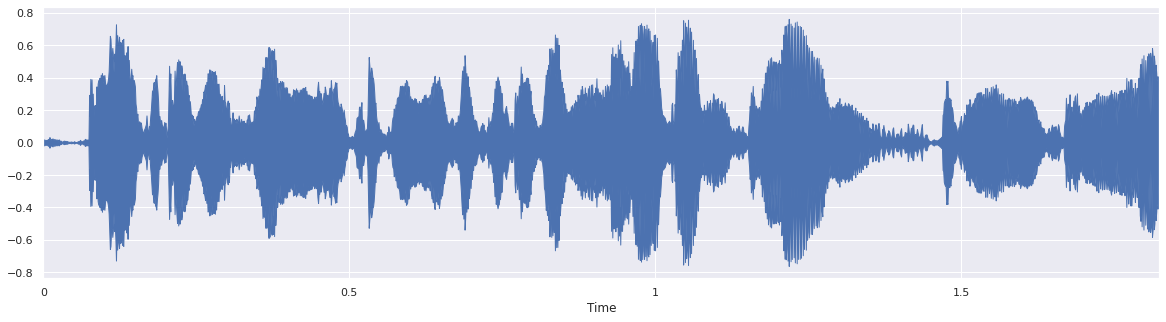

In [8]:
#call the plot wav function from the audio script to plot a sample wav file
audio.plot_wav(data['Location'][1],44100)

In [9]:
#we call the ipython function to confirm our audio and text are correct 
import IPython.display as ipd
ipd.Audio(data['Location'][0],rate=44100)

In [13]:
#we create a durcation column to get the duration of the files

data['duration']=data['Location'].apply(lambda x: audio.caclulate_duration(x))

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

In [15]:
data.to_csv('clean_duration.csv',index=False)

wav_file  \
0      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
1      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
2      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
3      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
4      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
...                                                  ...   
10174  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10175  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10176  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10177  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10178  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   

                                                    text  length  \
0      yanayo andaliwa nami pendo pondo idhaa ya kisw...      51   
1      inayokutangazia moja kwa moja kutoka jijini da...      66   
2      juma hili bara la afrika limeshuhudia raia wa ...      59   
3        wakipiga kura ya maoni ilikufanya mabadiliko ya      47   
4                         kule abidjan raia wa jiji hilo      30   
...                                                  ...     ...   
10174             na somo lile lililopokelewa kule kenya      38   
10175            ambapo mtu aliyeshindwa kwenye uchaguzi      39   
10176        ni kauli yake mchambuzi wa masuala ya siasa      43   
10177  mwanasheria anayemtetea rais wa zamani wa liberia      49   
10178  na kesi yake ya kubadilishana almasi na silaha...      85   

                                                Location  duration  
0      ../data/alldata\SWH-05-20101106_16k-emission_s...  3.100000  
1      ../data/alldata\SWH-05-20101106_16k-emission_s...  3.650023  
2      ../data/alldata\SWH-05-20101106_16k-emission_s...  3.900000  
3      ../data/alldata\SWH-05-20101106_16k-emission_s...  2.940000  
4      ../data/alldata\SWH-05-20101106_16k-emission_s...  2.450023  
...                                                  ...       ...  
10174  ../data/alldata\SWH-15-20110310_16k-emission_s...  2.500091  
10175  ../data/alldata\SWH-15-20110310_16k-emission_s...  2.910023  
10176  ../data/alldata\SWH-15-20110310_16k-emission_s...  2.950023  
10177  ../data/alldata\SWH-15-20110310_16k-emission_s...  2.590023  
10178  ../data/alldata\SWH-15-20110310_16k-emission_s...  5.010023  

[10179 rows x 5 columns]

## Duration Count

In [16]:
!pip install cufflinks

     |████████████████████████████████| 81 kB 4.5 MB/s  eta 0:00:01
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67922 sha256=eca00b57ed049b4521002825d1b0f08bd0b1fd2c852ce3feebc9b1885f1d2033
  Stored in directory: /home/blaise_papa/.cache/pip/wheels/29/b4/f8/2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks


We visualize a couple of plots to understand analysis of the audio files

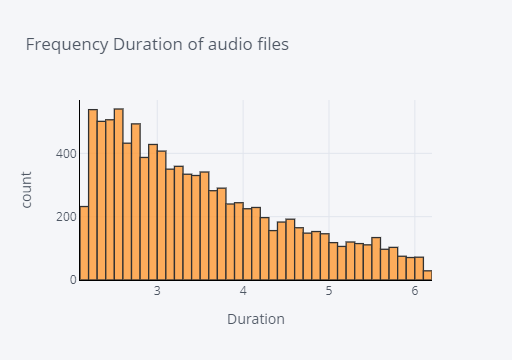

In [17]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

data['duration'].iplot(
    kind='hist',
    
    xTitle='Duration',
    linecolor='black',
    yTitle='count',
    title='Frequency Duration of audio files')


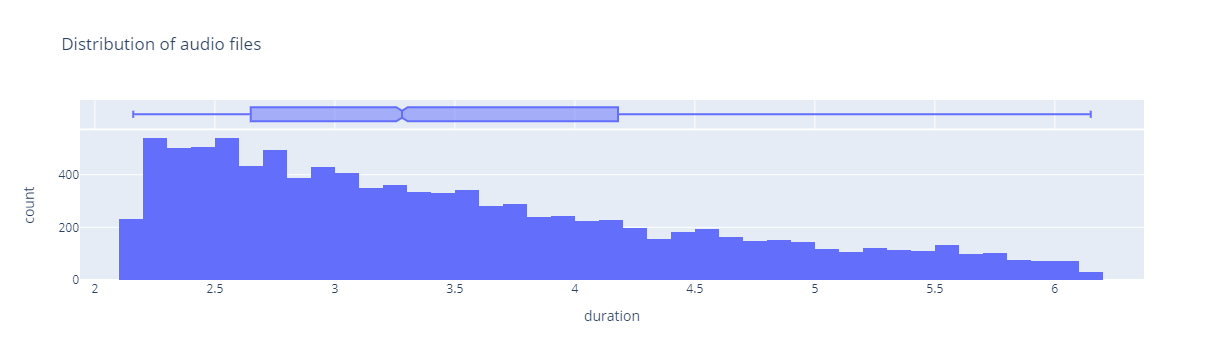

In [18]:
df = px.data.tips()
fig = px.histogram(data, x="duration",
                   marginal="box",title="Distribution of audio files")
fig.show()

Most of the audio files are between 2.6-3.2 seconds long with extreme cases of audios being longer than 6 seconds. The data displays a positive skewness with the right tail being longer and hence more values fall below the median

## Lenght of Texts

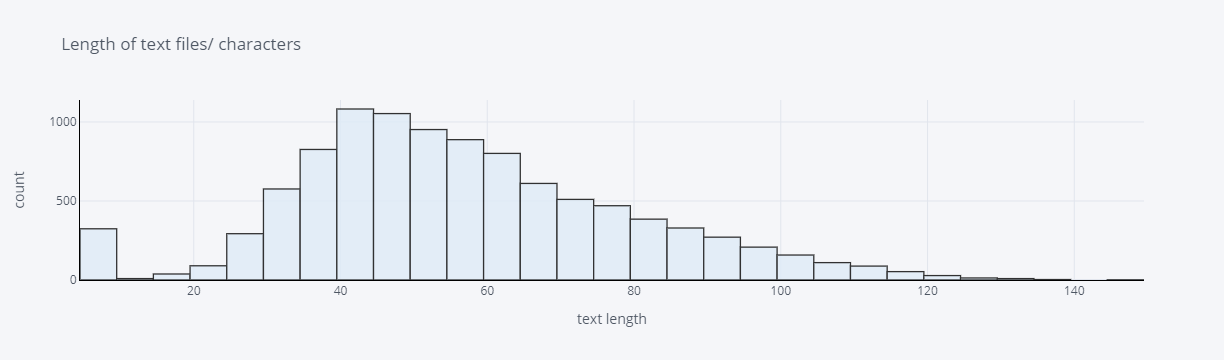

In [19]:
data['length'].iplot(
    kind='hist',
    bins=50,
    xTitle='text length',
    linecolor='black',
    yTitle='count',
    title='Length of text files/ characters',
    colorscale = 'blues')

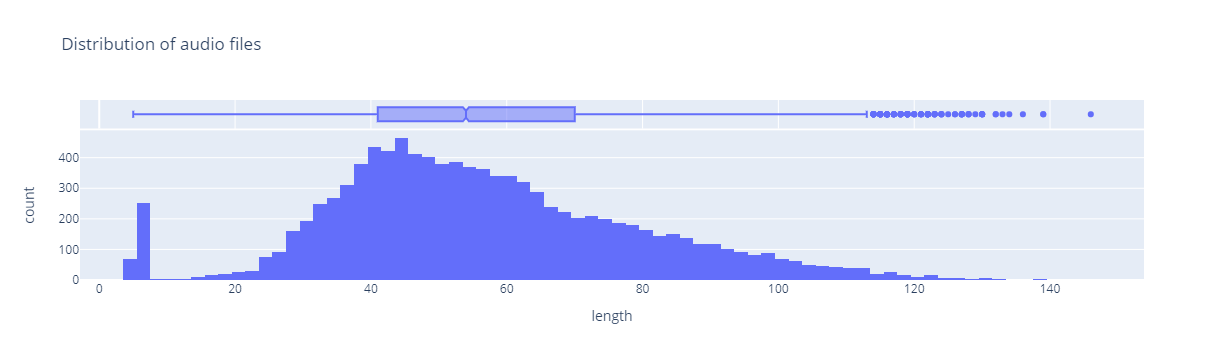

In [20]:
df = px.data.tips()
fig = px.histogram(data, x="length",
                   marginal="box",title="Distribution of audio files")
fig.show()

Most of the text transcriptions have 41 to 70 characters with extereme cases noted with transcripts that have 146 characters and as low as 5 charcaters

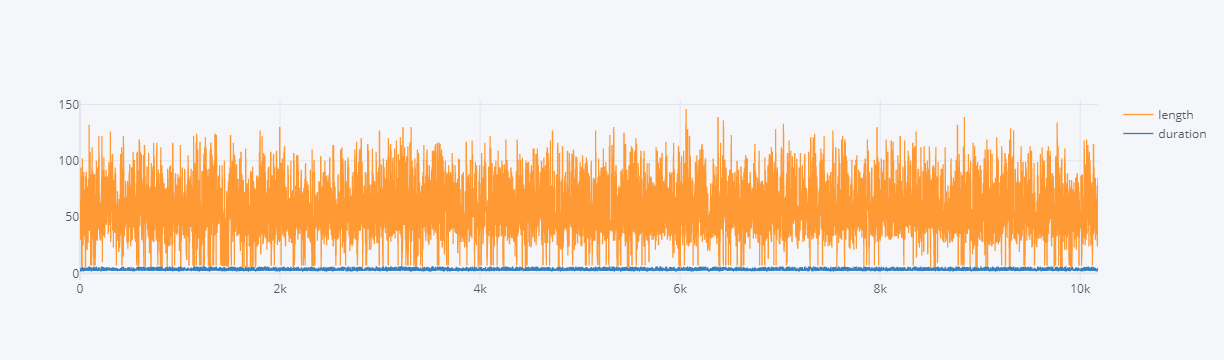

In [21]:
data[['length','duration']].iplot()

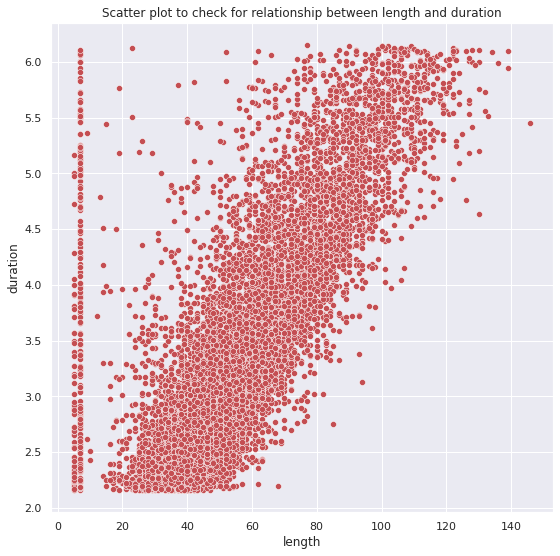

In [23]:
plt.figure(figsize=(9,9))
sns.scatterplot(data=data,y='duration',x='length',color='r')
plt.title("Scatter plot to check for relationship between length and duration")
plt.savefig("../plots/scatterlen.png")

We notice that we have a couple of few lenght characters that have longer duration. Might be music  

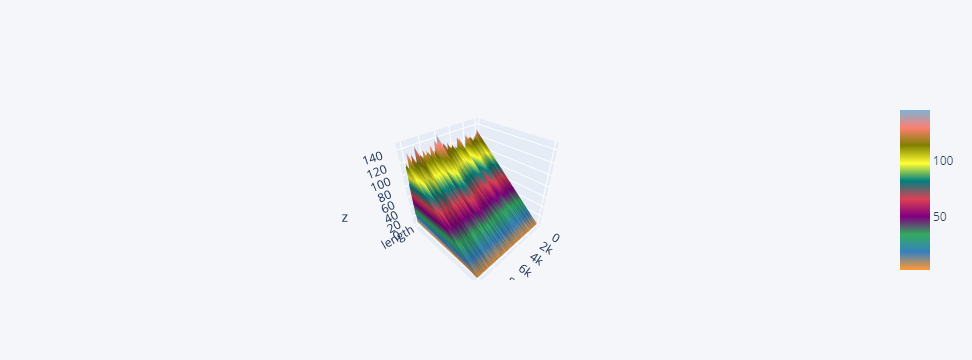

In [24]:
data[['length','duration']].iplot(kind='surface')

## Text

 #### Calculating bag of words ####### 

 ###### Calculating word frequency in corpus ###### 

###### Done ###### 
na 4214
ya 4026
wa 2939
kwa 2051
ni 1443
katika 1135
la 810
nchini 647
za 644
kwamba 616
kuwa 561
hiyo 532
kama 501
nchi 444
moja 427
sasa 411
watu 387
unk 379
hii 379
music 375


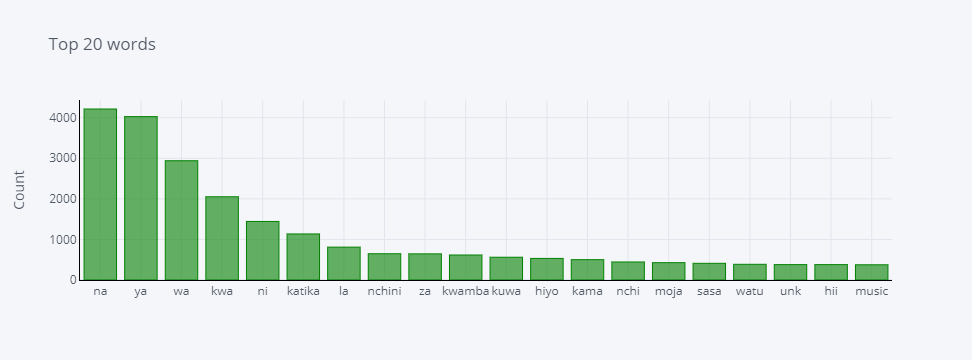

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
import pprint


####### define a function that gets the frequncy of the words #######


def get_top_n_words(corpus, n=None):
    logging.info(" ####### Initializing top words function ####### \n")
    print(" #### Calculating bag of words ####### \n")
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    print(" ###### Calculating word frequency in corpus ###### \n")
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    print("###### Done ###### ")
    logging.info(" #### generated word frequency ##### ")
    return words_freq[:n]



common_words = get_top_n_words(data['text'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df1.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
kind='bar', yTitle='Count', linecolor='black', title='Top 20 words',color='green')

In [27]:
!pip install wordcloud

     |████████████████████████████████| 363 kB 9.1 MB/s eta 0:00:01


In [28]:
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
from textwrap import wrap


texts = " ".join(char for char in data.text)
print ("There are {} words in the combination of all review.".format(len(texts)))

There are 586571 words in the combination of all review.


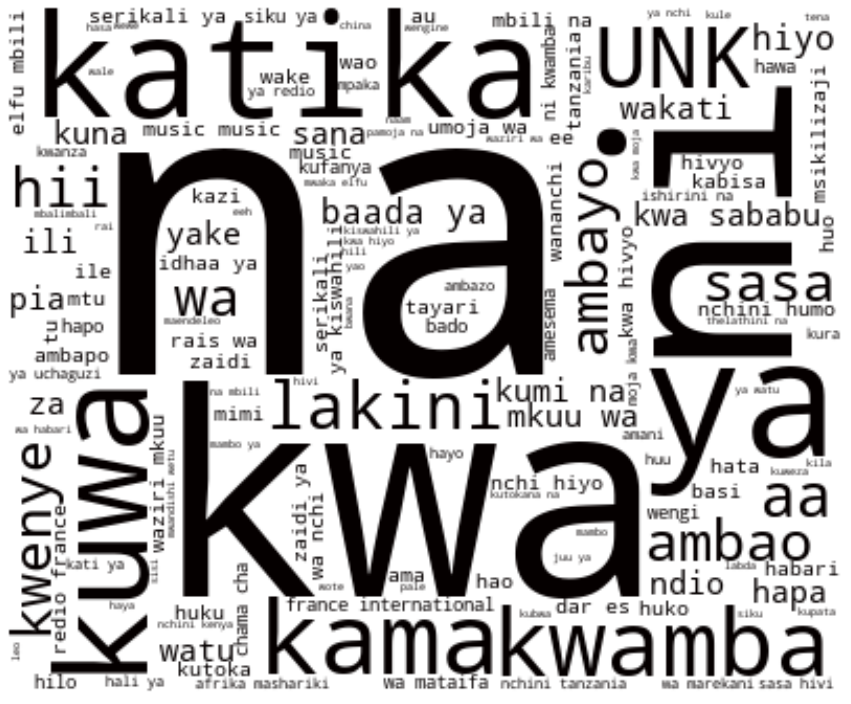

<Figure size 432x288 with 0 Axes>

In [30]:
######## This creates a nice color font for displaying word count words #######
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")



####### Generate a word cloud image ######
wordcloud = WordCloud( background_color="white",width=400, height=330, max_words=150).generate(texts)
plt.figure(figsize=(15,15))
wordcloud.recolor(color_func = black_color_func)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig("../plots/wordcloud.png")


Most of the words in the word cloud are basic swahili connectors such as na,kwa,ya. Hence don't carry lots of meaning

# Pre-Processing

## Text Preprocessing

In [31]:
##### we create a pipleine that cleans the text #######
 ### start of by shifting text to lower case ####
def text_prep():
    
    logging.info(" ====== Initializing text_prep ========= ")
    print(" ######### changing text case ###### \n")
    data['text']=data['text'].apply(lambda x: x.lower())


    ###### we remove any punctuation marks that might hinder the model ####
    print("###### removing punctuations ######## \n")
    data['text']=data['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

    print("####### removing white-spaces and padding ####### \n")
    ###### we remove any padding and whitespaces ########
    data['text']=data['text'].apply(lambda x: re.sub(' +',' ',x))
    
    print("####### Text Prep Done ######### \n")
    
    return data



In [32]:
text_prep()

 ######### changing text case ###### 

###### removing punctuations ######## 

####### removing white-spaces and padding ####### 

####### Text Prep Done ######### 



wav_file  \
0      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
1      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
2      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
3      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
4      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
...                                                  ...   
10174  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10175  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10176  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10177  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10178  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   

                                                    text  length  \
0      yanayo andaliwa nami pendo pondo idhaa ya kisw...      51   
1      inayokutangazia moja kwa moja kutoka jijini da...      66   
2      juma hili bara la afrika limeshuhudia raia wa ...      59   
3        wakipiga kura ya maoni ilikufanya mabadiliko ya      47   
4                         kule abidjan raia wa jiji hilo      30   
...                                                  ...     ...   
10174             na somo lile lililopokelewa kule kenya      38   
10175            ambapo mtu aliyeshindwa kwenye uchaguzi      39   
10176        ni kauli yake mchambuzi wa masuala ya siasa      43   
10177  mwanasheria anayemtetea rais wa zamani wa liberia      49   
10178  na kesi yake ya kubadilishana almasi na silaha...      85   

                                                Location  duration  
0      ../data/alldata/SWH-05-20101106_16k-emission_s...  3.100000  
1      ../data/alldata/SWH-05-20101106_16k-emission_s...  3.650023  
2      ../data/alldata/SWH-05-20101106_16k-emission_s...  3.900000  
3      ../data/alldata/SWH-05-20101106_16k-emission_s...  2.940000  
4      ../data/alldata/SWH-05-20101106_16k-emission_s...  2.450023  
...                                                  ...       ...  
10174  ../data/alldata/SWH-15-20110310_16k-emission_s...  2.500091  
10175  ../data/alldata/SWH-15-20110310_16k-emission_s...  2.910023  
10176  ../data/alldata/SWH-15-20110310_16k-emission_s...  2.950023  
10177  ../data/alldata/SWH-15-20110310_16k-emission_s...  2.590023  
10178  ../data/alldata/SWH-15-20110310_16k-emission_s...  5.010023  

[10179 rows x 5 columns]

 ##### Generating stop words ###### 


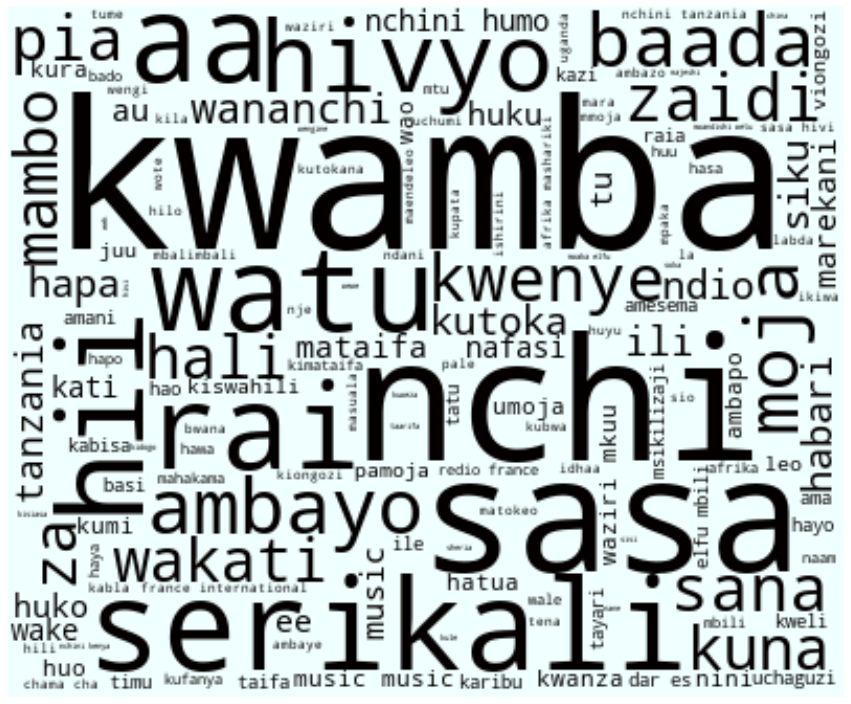

<Figure size 432x288 with 0 Axes>

In [35]:
###### we recaculate our wordcloud but this time we filter off common stop words #####
print(" ##### Generating stop words ###### ")
stopwords = set(STOPWORDS)
stopwords.update(["na", "lakini", "ingawa", "ya", "wa","kwa","sababu","hadi","hata","mimi","kama","yake","yao","yangu","yetu","katika","kuwa","ni","hiyo","ambao","UNK"])




def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")



# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords ,background_color="azure",width=400, height=330, max_words=150,colormap="mako").generate(texts)
plt.figure(figsize=(15,15))
wordcloud.recolor(color_func = black_color_func)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig("../plots/cleanWordcloud.png")

In [36]:
### We carry out some cleaning and drop rows that contain certain words that have no meaning ###

### we drop rows containing unk,music, and unk

data = data[~data['text'].isin(['unk','music','UNK'])]
data


wav_file  \
0      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
1      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
2      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
3      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
4      SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
...                                                  ...   
10174  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10175  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10176  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10177  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
10178  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   

                                                    text  length  \
0      yanayo andaliwa nami pendo pondo idhaa ya kisw...      51   
1      inayokutangazia moja kwa moja kutoka jijini da...      66   
2      juma hili bara la afrika limeshuhudia raia wa ...      59   
3        wakipiga kura ya maoni ilikufanya mabadiliko ya      47   
4                         kule abidjan raia wa jiji hilo      30   
...                                                  ...     ...   
10174             na somo lile lililopokelewa kule kenya      38   
10175            ambapo mtu aliyeshindwa kwenye uchaguzi      39   
10176        ni kauli yake mchambuzi wa masuala ya siasa      43   
10177  mwanasheria anayemtetea rais wa zamani wa liberia      49   
10178  na kesi yake ya kubadilishana almasi na silaha...      85   

                                                Location  duration  
0      ../data/alldata/SWH-05-20101106_16k-emission_s...  3.100000  
1      ../data/alldata/SWH-05-20101106_16k-emission_s...  3.650023  
2      ../data/alldata/SWH-05-20101106_16k-emission_s...  3.900000  
3      ../data/alldata/SWH-05-20101106_16k-emission_s...  2.940000  
4      ../data/alldata/SWH-05-20101106_16k-emission_s...  2.450023  
...                                                  ...       ...  
10174  ../data/alldata/SWH-15-20110310_16k-emission_s...  2.500091  
10175  ../data/alldata/SWH-15-20110310_16k-emission_s...  2.910023  
10176  ../data/alldata/SWH-15-20110310_16k-emission_s...  2.950023  
10177  ../data/alldata/SWH-15-20110310_16k-emission_s...  2.590023  
10178  ../data/alldata/SWH-15-20110310_16k-emission_s...  5.010023  

[9857 rows x 5 columns]

In [37]:
texts = " ".join(char for char in data.text)
print ("There are {} words in the combination of all review.".format(len(texts)))

There are 583124 words in the combination of all review.


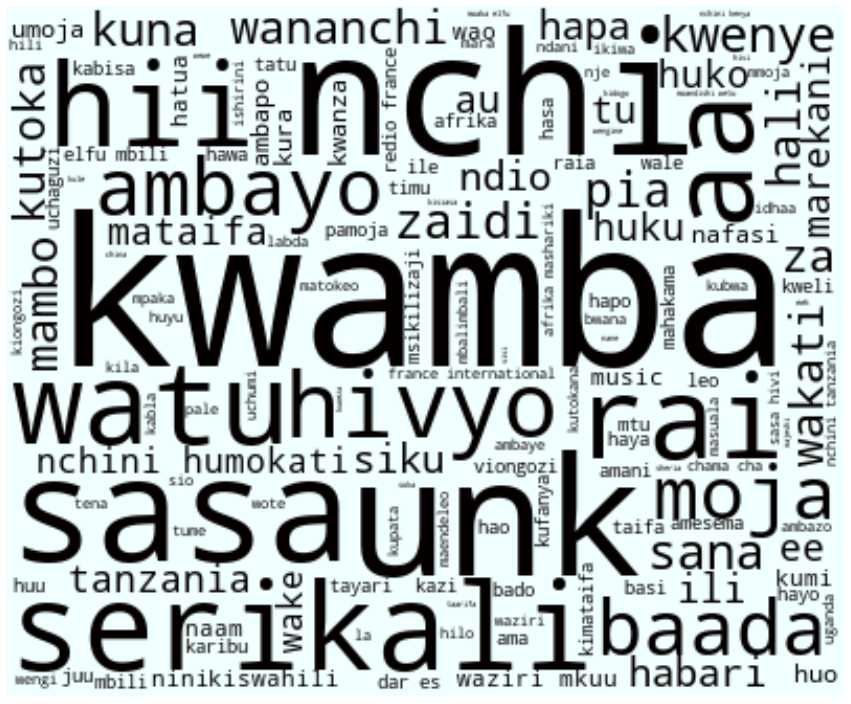

In [38]:

stopwords = set(STOPWORDS)
stopwords.update(["na", "lakini", "ingawa", "ya", "wa","kwa","sababu","hadi","hata","mimi","kama","yake","yao","yangu","yetu","katika","kuwa","ni","hiyo","ambao"])
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
# Generate a word cloud image


wordcloud = WordCloud(stopwords=stopwords ,background_color="azure",width=400, height=330, max_words=150,colormap="mako").generate(texts)
plt.figure(figsize=(15,15))
wordcloud.recolor(color_func = black_color_func)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Audio Preprocessing 

We can drop audios that are of exteremes, that is more than roughtly 5 seconds and less than a second

In [39]:
data=data[(data['duration']>=1.5)&(data['duration']<=5.2)]


#we reset our indeces to adjust to new data

data=data.reset_index()


In [40]:
data.drop(labels='index',axis=1,inplace=True)
data

wav_file  \
0     SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
1     SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
2     SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
3     SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
4     SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
...                                                 ...   
8982  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
8983  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
8984  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
8985  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
8986  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   

                                                   text  length  \
0     yanayo andaliwa nami pendo pondo idhaa ya kisw...      51   
1     inayokutangazia moja kwa moja kutoka jijini da...      66   
2     juma hili bara la afrika limeshuhudia raia wa ...      59   
3       wakipiga kura ya maoni ilikufanya mabadiliko ya      47   
4                        kule abidjan raia wa jiji hilo      30   
...                                                 ...     ...   
8982             na somo lile lililopokelewa kule kenya      38   
8983            ambapo mtu aliyeshindwa kwenye uchaguzi      39   
8984        ni kauli yake mchambuzi wa masuala ya siasa      43   
8985  mwanasheria anayemtetea rais wa zamani wa liberia      49   
8986  na kesi yake ya kubadilishana almasi na silaha...      85   

                                               Location  duration  
0     ../data/alldata/SWH-05-20101106_16k-emission_s...  3.100000  
1     ../data/alldata/SWH-05-20101106_16k-emission_s...  3.650023  
2     ../data/alldata/SWH-05-20101106_16k-emission_s...  3.900000  
3     ../data/alldata/SWH-05-20101106_16k-emission_s...  2.940000  
4     ../data/alldata/SWH-05-20101106_16k-emission_s...  2.450023  
...                                                 ...       ...  
8982  ../data/alldata/SWH-15-20110310_16k-emission_s...  2.500091  
8983  ../data/alldata/SWH-15-20110310_16k-emission_s...  2.910023  
8984  ../data/alldata/SWH-15-20110310_16k-emission_s...  2.950023  
8985  ../data/alldata/SWH-15-20110310_16k-emission_s...  2.590023  
8986  ../data/alldata/SWH-15-20110310_16k-emission_s...  5.010023  

[8987 rows x 5 columns]

In [42]:
data.to_csv("../data/clean_duration.csv",index=False)

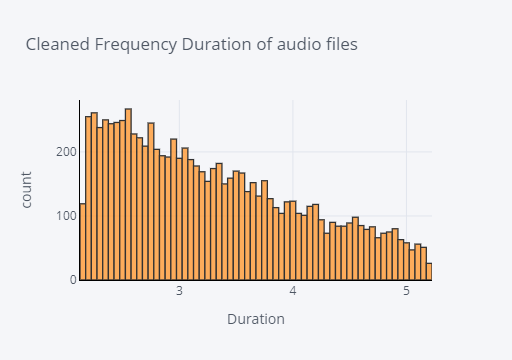

In [43]:
data['duration'].iplot(
    kind='hist',
    
    xTitle='Duration',
    linecolor='black',
    yTitle='count',
    title='Cleaned Frequency Duration of audio files')


## Frequency Charts

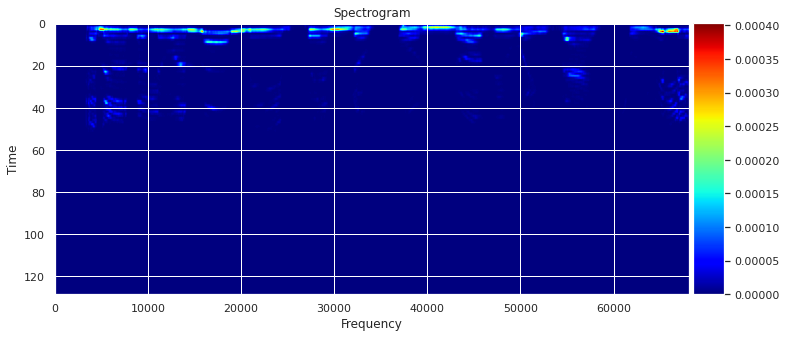

In [60]:
audio.plot_spectogram(data['Location'][0])

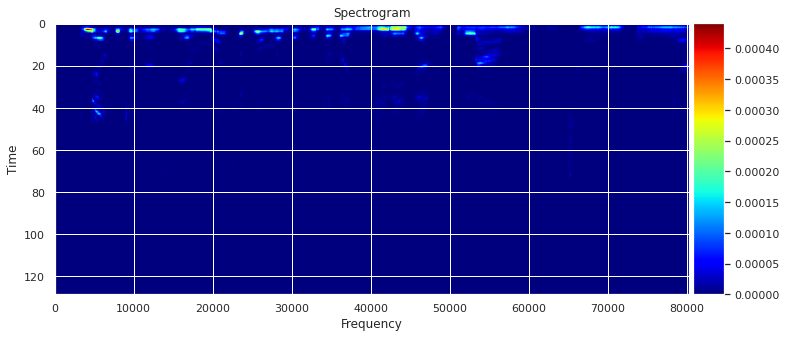

In [61]:

audio.plot_spectogram(data['Location'][1])

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

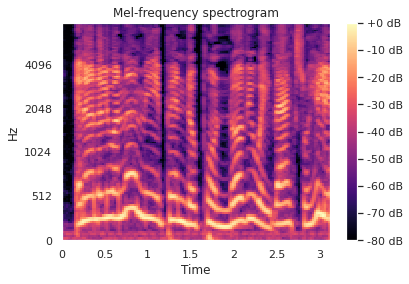

In [62]:
y, sr = librosa.load(data['Location'][0])
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

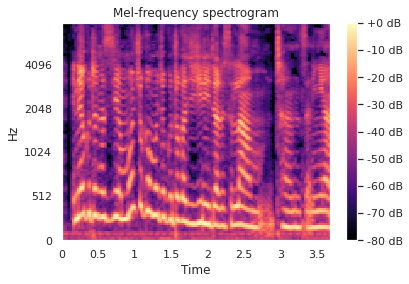

In [63]:
y, sr = librosa.load(data['Location'][1])
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

## Resampling

We want to resample so we first check and have a look at current sample rate 

In [44]:
sample,sr=librosa.load(data['Location'][0])
print(sr)

22050


In [45]:
import soundfile as sf


def resample_data(audio_file,resample_rate):
    #this function takes in the audio file and resample it a defined sampling rate   
    print(" ============ Resampling data and overwriting audio  =================")
    samples,sample_rate=librosa.load(audio_file,sr=resample_rate)
    
    print(" ========= writing new audio file to location =========== ")
    sf.write(audio_file,samples,sample_rate)
    
    return samples 

In [46]:
#we call the ipython function to confirm our audio and text are correct 
import IPython.display as ipd
ipd.Audio(data['Location'][1])

In [47]:
#we create a tokenizer for all the letters of the swahili alphabet
def text_tokens():
    print(" ###### creating text tokens ####### ")
    logging.info(" ###### text token function initialized ##### ")
    swahilibet="a b c d e f g h i j k l m n o p q r s t u v w x y z"
    swabet=swahilibet.split()
    swa_map={}
    swa_map[""]=0
    swa_map["<SPACE>"]=1
    counter=2
    for swa in swabet:
        swa_map[swa]=counter
        counter +=1
    swahilii={ v: k for k,v in swa_map.items()}
    #it returns the word-to-number and number-to-word equvalent of them
    return swa_map,swahilii


In [48]:
char_map,swahilii=text_tokens()

 ###### creating text tokens ####### 


In [49]:
char_map

{'': 0,
 '<SPACE>': 1,
 'a': 2,
 'b': 3,
 'c': 4,
 'd': 5,
 'e': 6,
 'f': 7,
 'g': 8,
 'h': 9,
 'i': 10,
 'j': 11,
 'k': 12,
 'l': 13,
 'm': 14,
 'n': 15,
 'o': 16,
 'p': 17,
 'q': 18,
 'r': 19,
 's': 20,
 't': 21,
 'u': 22,
 'v': 23,
 'w': 24,
 'x': 25,
 'y': 26,
 'z': 27}

In [50]:
swahilii

{0: '',
 1: '<SPACE>',
 2: 'a',
 3: 'b',
 4: 'c',
 5: 'd',
 6: 'e',
 7: 'f',
 8: 'g',
 9: 'h',
 10: 'i',
 11: 'j',
 12: 'k',
 13: 'l',
 14: 'm',
 15: 'n',
 16: 'o',
 17: 'p',
 18: 'q',
 19: 'r',
 20: 's',
 21: 't',
 22: 'u',
 23: 'v',
 24: 'w',
 25: 'x',
 26: 'y',
 27: 'z'}

In [55]:
#lets see if the text-to-int actually works
def text_to_int_sequence(text):
    """ Convert text to an integer sequence """
    
    print(" ===== Generating the charcter tokens ======== ")
    int_sequence = []
    for c in text:
        print ("======== Generating =========== ")
        if c == ' ':
            ch = char_map['<SPACE>']
            
        else:

            ch = char_map[c]
        int_sequence.append(ch)
    
    return int_sequence

#lets reconvert back
def int_sequence_to_text(int_sequence):
    """ Convert an integer sequence to text """
    text = []
    for c in int_sequence:
        ch = swahilii[c]
        text.append(ch)
    return text


In [56]:
text_to_int_sequence(data['text'][0])

 ===== Generating the charcter tokens ======== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating ========

[26,
 2,
 15,
 2,
 26,
 16,
 1,
 2,
 15,
 5,
 2,
 13,
 10,
 24,
 2,
 1,
 15,
 2,
 14,
 10,
 1,
 17,
 6,
 15,
 5,
 16,
 1,
 17,
 16,
 15,
 5,
 16,
 1,
 10,
 5,
 9,
 2,
 2,
 1,
 26,
 2,
 1,
 12,
 10,
 20,
 24,
 2,
 9,
 10,
 13,
 10]

In [57]:
int_sequence_to_text(text_to_int_sequence(data['text'][0]))

 ===== Generating the charcter tokens ======== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating =========== 
======== Generating ========

['y',
 'a',
 'n',
 'a',
 'y',
 'o',
 '<SPACE>',
 'a',
 'n',
 'd',
 'a',
 'l',
 'i',
 'w',
 'a',
 '<SPACE>',
 'n',
 'a',
 'm',
 'i',
 '<SPACE>',
 'p',
 'e',
 'n',
 'd',
 'o',
 '<SPACE>',
 'p',
 'o',
 'n',
 'd',
 'o',
 '<SPACE>',
 'i',
 'd',
 'h',
 'a',
 'a',
 '<SPACE>',
 'y',
 'a',
 '<SPACE>',
 'k',
 'i',
 's',
 'w',
 'a',
 'h',
 'i',
 'l',
 'i']

In [64]:
data

wav_file  \
0     SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
1     SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
2     SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
3     SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
4     SWH-05-20101106_16k-emission_swahili_05h30_-_0...   
...                                                 ...   
8982  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
8983  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
8984  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
8985  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   
8986  SWH-15-20110310_16k-emission_swahili_15h00_-_1...   

                                                   text  length  \
0     yanayo andaliwa nami pendo pondo idhaa ya kisw...      51   
1     inayokutangazia moja kwa moja kutoka jijini da...      66   
2     juma hili bara la afrika limeshuhudia raia wa ...      59   
3       wakipiga kura ya maoni ilikufanya mabadiliko ya      47   
4                        kule abidjan raia wa jiji hilo      30   
...                                                 ...     ...   
8982             na somo lile lililopokelewa kule kenya      38   
8983            ambapo mtu aliyeshindwa kwenye uchaguzi      39   
8984        ni kauli yake mchambuzi wa masuala ya siasa      43   
8985  mwanasheria anayemtetea rais wa zamani wa liberia      49   
8986  na kesi yake ya kubadilishana almasi na silaha...      85   

                                               Location  duration  
0     ../data/alldata/SWH-05-20101106_16k-emission_s...  3.100000  
1     ../data/alldata/SWH-05-20101106_16k-emission_s...  3.650023  
2     ../data/alldata/SWH-05-20101106_16k-emission_s...  3.900000  
3     ../data/alldata/SWH-05-20101106_16k-emission_s...  2.940000  
4     ../data/alldata/SWH-05-20101106_16k-emission_s...  2.450023  
...                                                 ...       ...  
8982  ../data/alldata/SWH-15-20110310_16k-emission_s...  2.500091  
8983  ../data/alldata/SWH-15-20110310_16k-emission_s...  2.910023  
8984  ../data/alldata/SWH-15-20110310_16k-emission_s...  2.950023  
8985  ../data/alldata/SWH-15-20110310_16k-emission_s...  2.590023  
8986  ../data/alldata/SWH-15-20110310_16k-emission_s...  5.010023  

[8987 rows x 5 columns]

In [65]:
newdata=data[['Location','text','duration']]

In [66]:
newdata.columns=['key','text','duration']

In [68]:
len(data)*.7

6290.9

In [69]:
###### splititng data into train and test samples ###### 


train_data=newdata.iloc[:6290,:]
valid_data=newdata.iloc[6291:,:]

print("Shape of new dataframes - {} , {}".format(train_data.shape, valid_data.shape))

Shape of new dataframes - (6290, 3) , (2696, 3)


In [70]:
#convert to json files that weill be processed by our files

train_data.to_json('../data/trainprep_corpus.json', orient='records', lines=True)
valid_data.to_json('../data/validprep_corpus.json', orient='records', lines=True)

In [6]:
from models import *
from moedlbuild import *
from data_gen import AudioGenerator

ModuleNotFoundError: No module named 'models'

ModuleNotFoundError: No module named 'data_gen'